# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [1]:
import numpy as np

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы:

In [2]:
a = np.array([0,1,2,3])
a

array([0, 1, 2, 3])

In [3]:
type(a), a.dtype

(numpy.ndarray, dtype('int64'))

In [4]:
a.ndim, a.shape, len(a)

(1, (4,), 4)

In [5]:
b = np.array((3, 4, 5))
b

array([3, 4, 5])

В numpy существует множество функций для генерации массивов:

#### `arange`

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

In [6]:
x = np.arange(0, 10, 1) # аргументы: start, stop, step
type(range(10))

range

In [7]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### `linspace` и `logspace`

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

In [8]:
np.linspace(0, 10, 10) # аргументы: start, stop, число точек

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [9]:
np.logspace(0.1, 1, 4, base=2)

array([1.07177346, 1.31950791, 1.62450479, 2.        ])

#### `zeros`, `ones`, `zeros_like` и `ones_like`

In [10]:
np.zeros((5,))   # Аргумент должен быть кортежем

array([0., 0., 0., 0., 0.])

In [11]:
a = np.ones((4,))
a

array([1., 1., 1., 1.])

In [12]:
b = np.zeros_like(a)
b

array([0., 0., 0., 0.])

In [13]:
c = np.ones_like(b)
c

array([1., 1., 1., 1.])

### Многомерные массивы

In [14]:
# Матрица
m = np.array([[1., 2.], [3., 4.]])
m

array([[1., 2.],
       [3., 4.]])

In [15]:
type(m), m.dtype

(numpy.ndarray, dtype('float64'))

In [16]:
m.ndim, np.shape(m), len(m), np.size(m)

(2, (2, 2), 2, 4)

При попытке назначить значение другого типа будет выдана ошибка:

In [17]:
m[0,0] = 'hello' 

ValueError: could not convert string to float: 'hello'

#### `zeros`, `ones`, `zeros_like` и `ones_like`

In [ ]:
a = np.ones((3, 3))
a

In [ ]:
b = np.zeros((2, 2))
b

#### Другие функции

In [ ]:
c = np.eye(3) # единичная матрица
c

In [ ]:
d = np.diag([3, 5, 7]) # диагональная матрица
d

### Упражнение 1
Построить диагональную матрицу, на диагонали которой расположены числа от 0 до 3.

### Упражнение 2

Создать матрицу размерности 3x3x3 со случайными значениями, имеющими равномерное распределение от 1 до 5.

## Копирование в NumPy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

In [18]:
m = np.array([[1, 2], [3, 4]])
m

array([[1, 2],
       [3, 4]])

In [19]:
n = m

In [20]:
# Изменение N меняет M
n[0, 0] = 10
n

array([[10,  2],
       [ 3,  4]])

In [21]:
m

array([[10,  2],
       [ 3,  4]])

Глубокая копия создается в NumPy с помощью функции `copy`:

In [22]:
n = np.copy(m)

In [23]:
# теперь при изменении N M остается нетронутым
n[0,0] = -5
n

array([[-5,  2],
       [ 3,  4]])

In [24]:
m

array([[10,  2],
       [ 3,  4]])

Слайсинг в numpy создает лишь представление изначального массива, т.е. копирования в памяти не происходит.

При изменении представления меняется и изначальный массив:

In [25]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [27]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [28]:
a # (!!)

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [29]:
a = np.arange(10)
b = a[::2].copy() # глубокое копирование
b[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

### `concatenate`

In [30]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [31]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [32]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [33]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### `hstack` и `vstack`

In [34]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [35]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

In [36]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
a[0], a[2], a[-1]

(0, 2, 9)

Для многомерных массивов индексами является кортеж целых чисел:

In [38]:
m = np.diag(np.arange(3))
m

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [39]:
m[1, 1]

1

In [40]:
m[(1, 1)]

1

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

In [41]:
m[1, :] # строка 1

array([0, 1, 0])

In [42]:
m[:, 2] # колонка 2

array([0, 0, 2])

Присваивание новых значений элементам массива:

In [43]:
m[2, 1] = 10
m

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [44]:
m[1, :] = 5
m[: ,2] = -1

In [45]:
m

array([[ 0,  0, -1],
       [ 5,  5, -1],
       [ 0, 10, -1]])

## Слайсинг

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

In [46]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Все три параметра слайсинга являются опциональными: по умолчанию `start` равен **0**, `end` равен последнему элемену и `step` равен **1** в `a[start:stop:step]`:

In [47]:
a[::] # все параметры слайсинга имеют значения по умолчанию

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
a[1:3]

array([1, 2])

In [49]:
a[:3]

array([0, 1, 2])

In [50]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [51]:
a[2:9:2] 

array([2, 4, 6, 8])

Отрицательные индексы отсчитываются от конца массива:

In [52]:
a[-1] # последний элемент массива

9

In [53]:
a[-3:] # последние три элемента

array([7, 8, 9])

Слайсы являются представлениями массива, а потому являются изменяемыми:

In [54]:
a[1:3] = [-2,-3]
a

array([ 0, -2, -3,  3,  4,  5,  6,  7,  8,  9])

Слайсинг работает точно так же и для многомерных массивов:

In [55]:
m = np.random.randint(1,100, size=(4, 4))
m

array([[37, 63, 36, 41],
       [79, 25, 54, 63],
       [39, 83, 60, 32],
       [61, 34, 87, 42]])

In [56]:
m[1:4, 1:4]

array([[25, 54, 63],
       [83, 60, 32],
       [34, 87, 42]])

In [57]:
m[::2, ::2]

array([[37, 36],
       [39, 60]])

### Упражнение 3
Создать нулевую матрицу размерности 5х5 с единицами по ее "границам".

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

In [58]:
a = np.arange(4)
a + 1

array([1, 2, 3, 4])

In [59]:
5*a

array([ 0,  5, 10, 15])

In [60]:
2**a

array([1, 2, 4, 8])

In [61]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

### Операции между массивами

In [62]:
a = np.arange(4)
b = np.ones(4) + 3
print('a = ', a)
print('b = ', b)
a - b

a =  [0 1 2 3]
b =  [4. 4. 4. 4.]


array([-4., -3., -2., -1.])

In [63]:
a * b

array([ 0.,  4.,  8., 12.])

Сравнения:

In [64]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [65]:
a > b

array([False, False,  True, False])

Логические операции:

In [66]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [67]:
a | b

array([ True,  True,  True, False])

In [68]:
np.logical_and(a, b)

array([ True, False, False, False])

In [69]:
a & b

array([ True, False, False, False])

Использование логических операторов позволяет обращаться к элементам массива через маску:

In [70]:
c = np.array([1, 2, 3, 4], dtype=int)
d = np.array([1, 2, 5, 6], dtype=int)
c[c == d]

array([1, 2])

### Упражнение 4
Создать случайный вектор размера 10 и найти его среднее значение.

### Упражнение 5
Создать случайную матрицу размерности 10х2, хранящую декартовы координаты. Затем конвертируйте их в полярные координаты.

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

In [71]:
m = np.array([[1., 2.], [3., 4.]])
m

array([[1., 2.],
       [3., 4.]])

In [72]:
m * m

array([[ 1.,  4.],
       [ 9., 16.]])

In [73]:
m.dot(m)

array([[ 7., 10.],
       [15., 22.]])

In [74]:
m @ m

array([[ 7., 10.],
       [15., 22.]])

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

In [75]:
m

array([[1., 2.],
       [3., 4.]])

In [76]:
m.T

array([[1., 3.],
       [2., 4.]])

In [77]:
m.transpose()

array([[1., 3.],
       [2., 4.]])

Другие математические функции:

In [78]:
c = np.matrix([[1j, 2j], [3j, 4j]])
c

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [79]:
np.conjugate(c)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово-сопряженная матрица(transpose + conjugate):

In [80]:
c.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

In [81]:
np.real(c) # то же: c.real

matrix([[0., 0.],
        [0., 0.]])

In [82]:
np.imag(c) # то же: c.imag

matrix([[1., 2.],
        [3., 4.]])

Модули элементов матрицы:

In [83]:
np.abs(c)

matrix([[1., 2.],
        [3., 4.]])

### Упражнение 6
Найти ближайшее значение к числу 4 в векторе [4.3, 1.0, 3.9, 5.0, 2.0, 1.9]

### Матричные вычисления

#### inverse

In [84]:
np.linalg.inv(c) # то же: C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [85]:
c.I * c

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

#### determinant

In [86]:
np.linalg.det(c)

/Users/alicee/opt/miniconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/alicee/opt/miniconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(2.0000000000000004+0j)

In [87]:
np.linalg.det(c.I)

(0.4999999999999998+0j)

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

In [88]:
def foo(x):
    if x >= 0:
        return 1
    else:
        return 0

In [89]:
foo(np.array([-3, -2, -1, 0, 1, 2, 3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Эта функция работает для скалярных данных. 

Чтобы это функция принимала векторные значения, необходимо провести векторизацию с помощью функии `vectorize`:

In [90]:
foo_vec = np.vectorize(foo)

In [91]:
foo_vec(np.array([-3, -2, -1, 0, 1, 2, 3]))

array([0, 0, 0, 1, 1, 1, 1])

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [92]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [93]:
import matplotlib.pyplot as plt

In [94]:
import numpy as np

Простейший пример построения графиков в matplotlib:

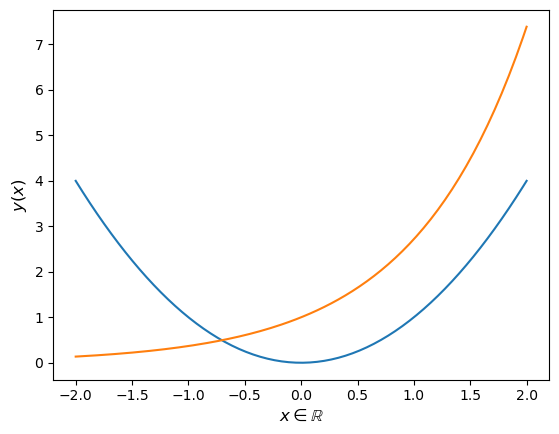

In [95]:
x = np.linspace(-2., 2., 128, endpoint=True)
y1 = x**2
y2 = np.exp(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel(r'$x \in \mathbb{R}$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.show()

Рекомендуется создавать отдельный объект для каждого более-менее сложного графика. Это можно реализоваться, например, с помощью функии `subplots`:

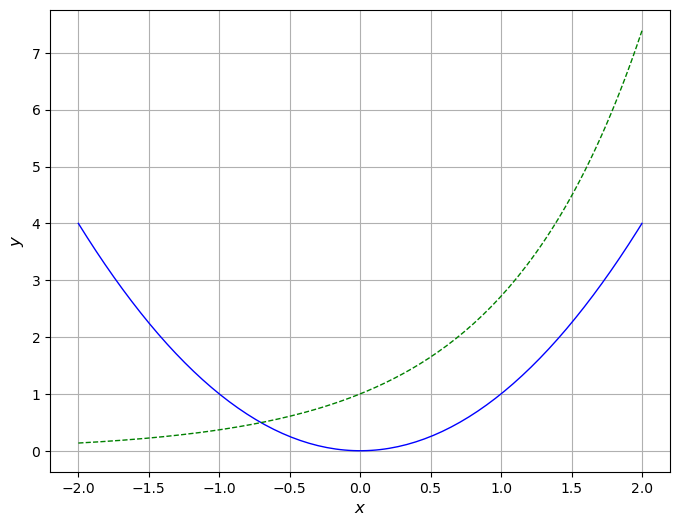

In [96]:
# Сетка графиков -- 1x1. Размер задается с помощью figsize.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, y1, color="blue", linewidth=1.0, linestyle="-")
ax.plot(x, y2, color="green", linewidth=1.0, linestyle="--")
ax.grid()
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
plt.show()

Множественные графики

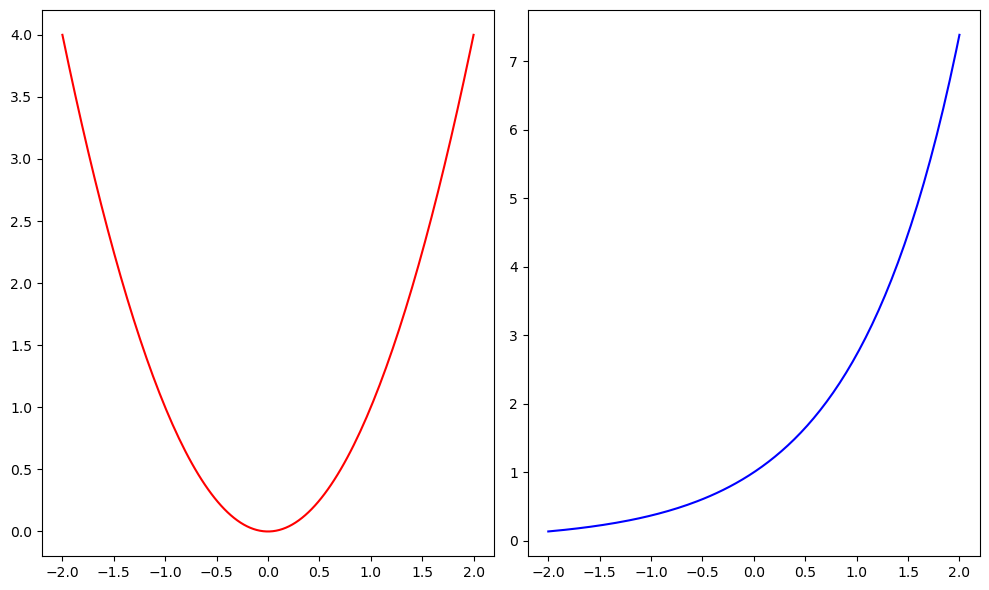

In [97]:
# Создаем 2 графика (в 2 колонках)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(x, y1, 'r')
axes[1].plot(x, y2, 'b')
fig.tight_layout()

## Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

In [98]:
fig.savefig("filename.png")

Также можно указать DPI и различные форматы:

In [99]:
fig.savefig("filename.pdf", dpi=200)

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

Пример использования описанного выше:

Text(0.5, 1.0, 'title')

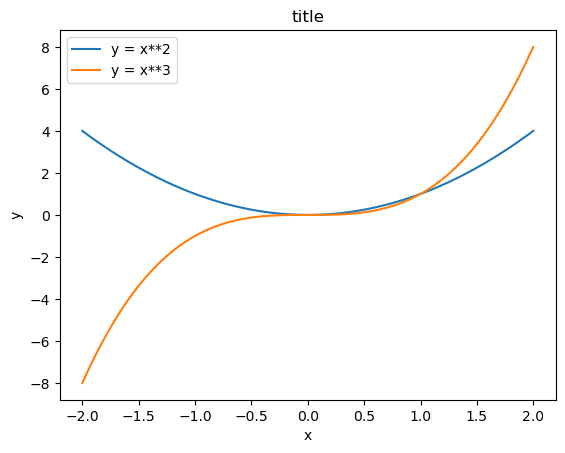

In [100]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')